In [1]:
# DS Libraries
import pandas as pd
import numpy as np
from scipy import stats
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# knn submodules from scikit learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

# Data Acquisition
from pydataset import data
import env
import acquire as acq
import prepare as prp

#Modeling
from sklearn.tree import DecisionTreeClassifier,\
export_text, \
plot_tree
from sklearn.metrics import accuracy_score, \
classification_report, \
confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# load telco via acquire.py
df = acq.new_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,3,1,3,2162-FRZAA,Male,0,Yes,Yes,63,No,...,Yes,No,No,No,39.35,2395.05,No,Two year,DSL,Bank transfer (automatic)
1,4,1,3,2160-GPFXD,Male,0,Yes,Yes,54,Yes,...,Yes,No,No,Yes,65.65,3566.7,No,Two year,DSL,Credit card (automatic)
2,2,1,2,2157-MXBJS,Male,0,Yes,No,13,Yes,...,No,Yes,Yes,Yes,75.30,989.45,Yes,One year,DSL,Mailed check
3,4,1,1,2155-AMQRX,Female,0,No,No,28,Yes,...,Yes,No,No,Yes,54.90,1505.15,No,Month-to-month,DSL,Credit card (automatic)
4,3,1,2,2150-WLKUW,Female,0,Yes,No,40,Yes,...,No,Yes,No,No,63.90,2635,No,One year,DSL,Bank transfer (automatic)


In [ ]:
df.info()

In [3]:
#drop out any redundant, excessively empty, or bad columns
df = df.drop(columns=['total_charges','customer_id'])
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,churn,contract_type,internet_service_type,payment_type
0,3,1,3,Male,0,Yes,Yes,63,No,No phone service,...,Yes,Yes,No,No,No,39.35,No,Two year,DSL,Bank transfer (automatic)
1,4,1,3,Male,0,Yes,Yes,54,Yes,Yes,...,No,Yes,No,No,Yes,65.65,No,Two year,DSL,Credit card (automatic)
2,2,1,2,Male,0,Yes,No,13,Yes,Yes,...,Yes,No,Yes,Yes,Yes,75.30,Yes,One year,DSL,Mailed check
3,4,1,1,Female,0,No,No,28,Yes,Yes,...,No,Yes,No,No,Yes,54.90,No,Month-to-month,DSL,Credit card (automatic)
4,3,1,2,Female,0,Yes,No,40,Yes,Yes,...,No,No,Yes,No,No,63.90,No,One year,DSL,Bank transfer (automatic)


In [4]:
# encode categorical values:                                      
df = pd.concat(
    [df, pd.get_dummies(df[['gender', 'partner', 'dependents', 'phone_service',
       'paperless_billing', 'churn']],
                    drop_first=True)], axis=1)

In [5]:
# SPLIT

def split_telco_data(df, target='churn'):
    '''
    split data will split data based on 
    the values present in a cleaned version
    
    '''
    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=2013,
                                   stratify=df[target])
    train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=2013,
                                   stratify=train_val[target])
    return train, validate, test

In [6]:
train, validate, test = split_telco_data(df,target='churn')

In [7]:
train.shape, validate.shape, test.shape

((3943, 28), (1691, 28), (1409, 28))

In [ ]:
train.info()

In [ ]:
for col in train.columns:
    print(train[col].value_counts(normalize=True))

#### DF STUFF No RUN

#### TRAIN STUFF Yes RUN

In [8]:
cat_cols, cat_cols_e, num_cols = [], [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if train[col].nunique() < 10:
            cat_cols_e.append(col)
        else:
            num_cols.append(col)

In [ ]:
cat_cols

In [ ]:
cat_cols_e

Univariate assessment of feature gender:


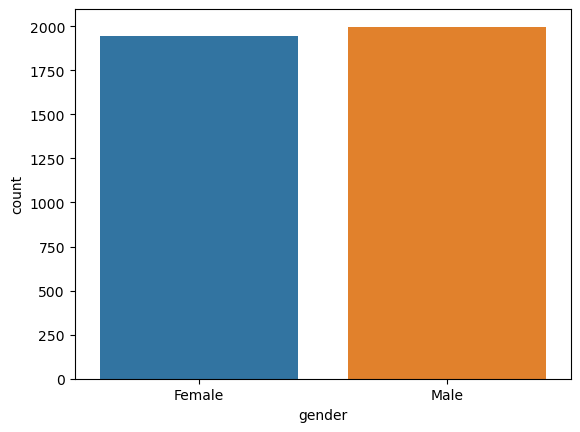

        gender    gender
Male      1997  0.506467
Female    1946  0.493533
Univariate assessment of feature partner:


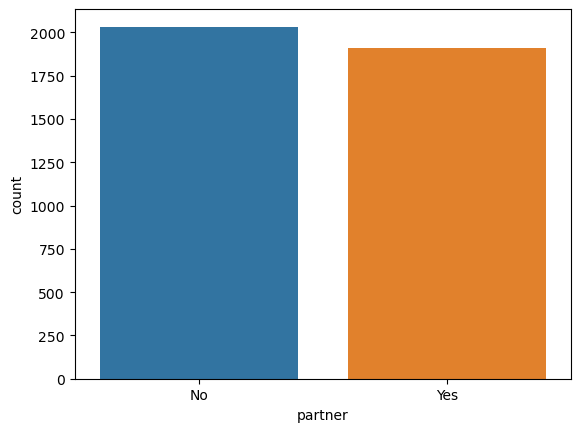

     partner   partner
No      2033  0.515597
Yes     1910  0.484403
Univariate assessment of feature dependents:


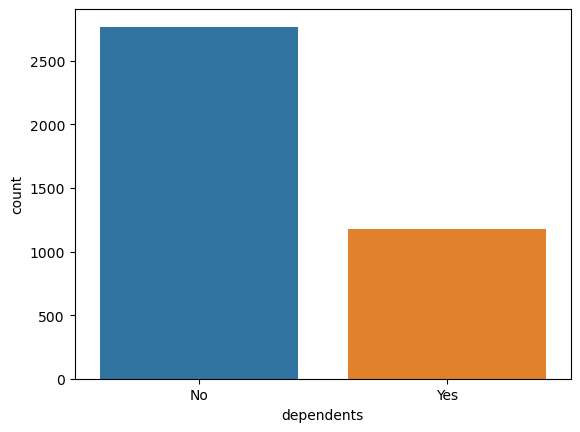

     dependents  dependents
No         2768    0.702004
Yes        1175    0.297996
Univariate assessment of feature phone_service:


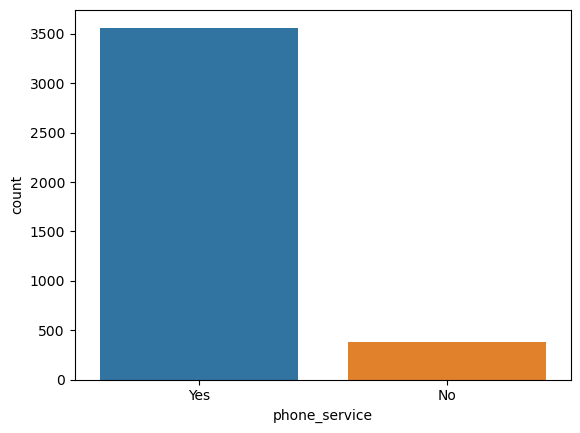

     phone_service  phone_service
Yes           3564        0.90388
No             379        0.09612
Univariate assessment of feature multiple_lines:


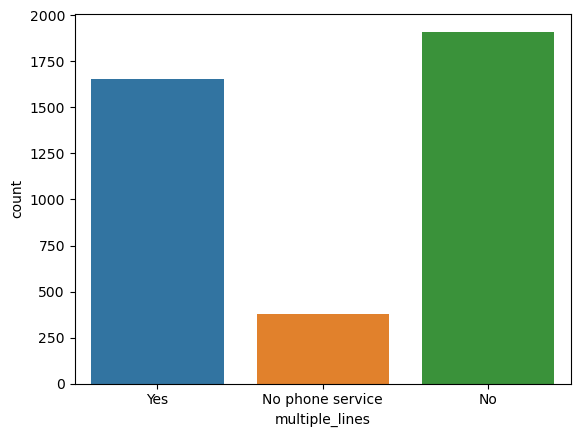

                  multiple_lines  multiple_lines
No                          1912         0.48491
Yes                         1652         0.41897
No phone service             379         0.09612
Univariate assessment of feature online_security:


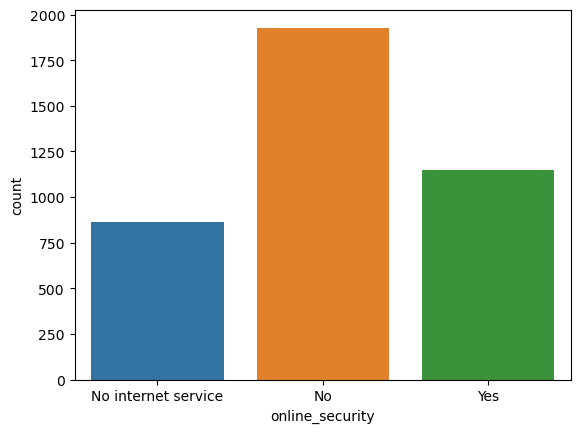

                     online_security  online_security
No                              1929         0.489221
Yes                             1149         0.291402
No internet service              865         0.219376
Univariate assessment of feature online_backup:


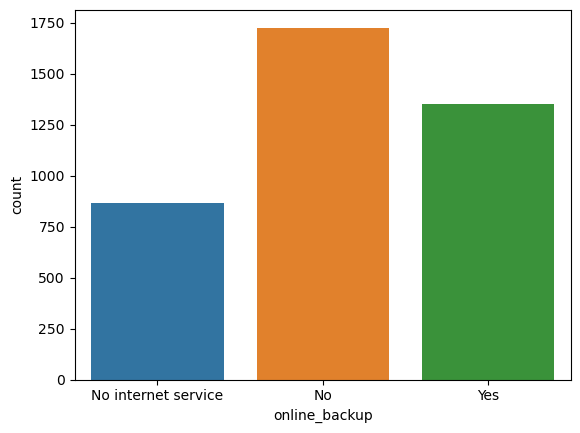

                     online_backup  online_backup
No                            1726       0.437738
Yes                           1352       0.342886
No internet service            865       0.219376
Univariate assessment of feature device_protection:


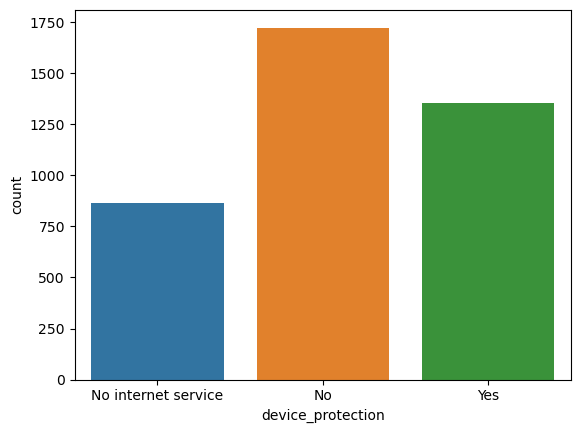

                     device_protection  device_protection
No                                1724           0.437231
Yes                               1354           0.343393
No internet service                865           0.219376
Univariate assessment of feature tech_support:


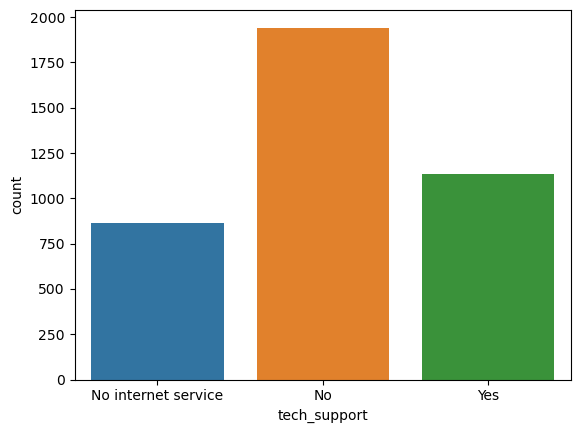

                     tech_support  tech_support
No                           1942      0.492518
Yes                          1136      0.288106
No internet service           865      0.219376
Univariate assessment of feature streaming_tv:


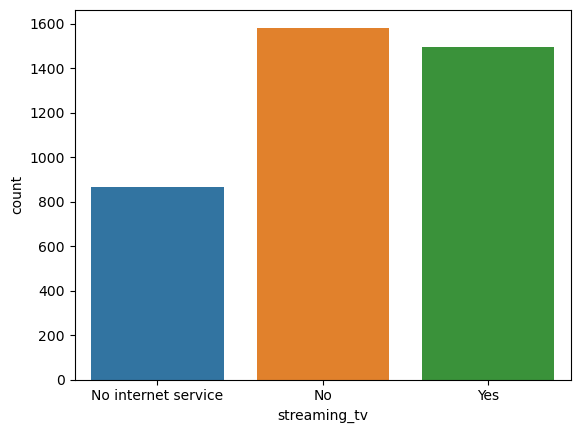

                     streaming_tv  streaming_tv
No                           1583      0.401471
Yes                          1495      0.379153
No internet service           865      0.219376
Univariate assessment of feature streaming_movies:


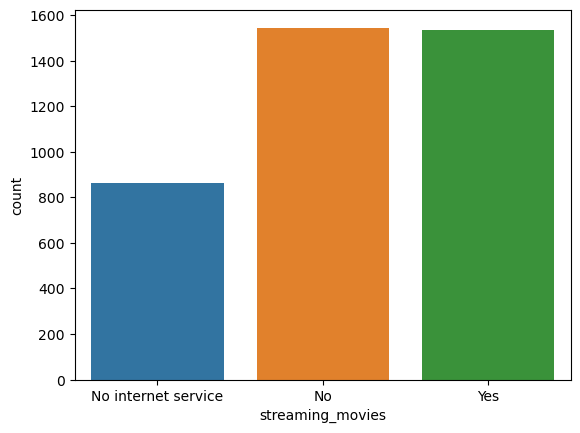

                     streaming_movies  streaming_movies
No                               1545          0.391834
Yes                              1533          0.388790
No internet service               865          0.219376
Univariate assessment of feature paperless_billing:


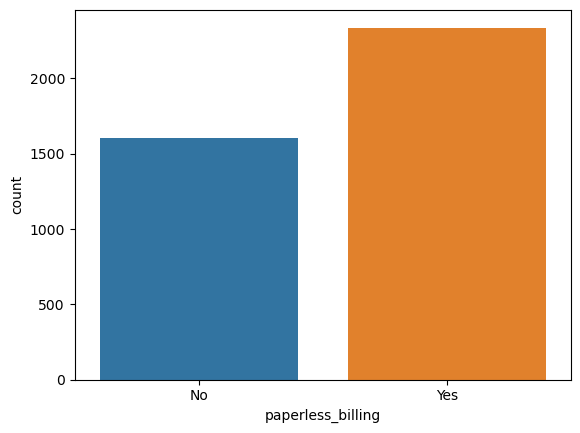

     paperless_billing  paperless_billing
Yes               2338            0.59295
No                1605            0.40705
Univariate assessment of feature churn:


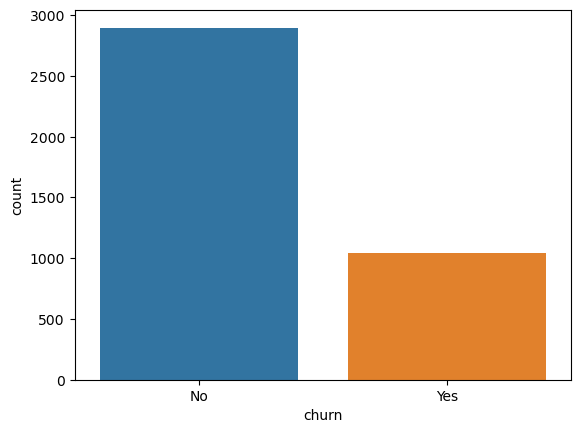

     churn    churn
No    2897  0.73472
Yes   1046  0.26528
Univariate assessment of feature contract_type:


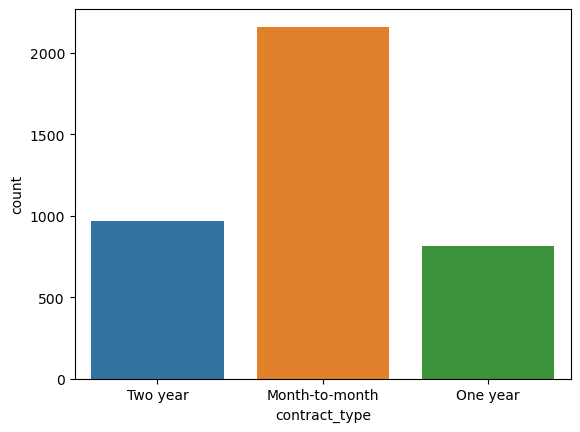

                contract_type  contract_type
Month-to-month           2161       0.548060
Two year                  969       0.245752
One year                  813       0.206188
Univariate assessment of feature internet_service_type:


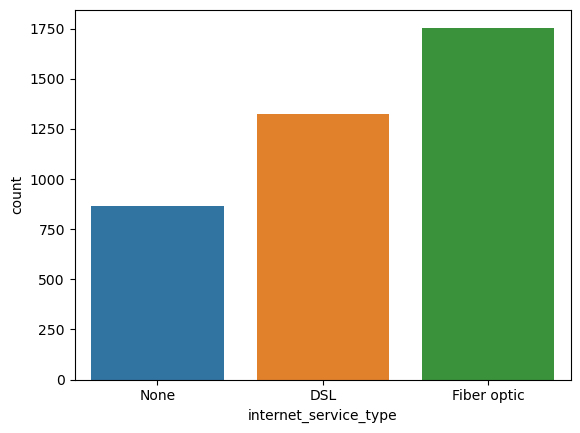

             internet_service_type  internet_service_type
Fiber optic                   1755               0.445093
DSL                           1323               0.335531
None                           865               0.219376
Univariate assessment of feature payment_type:


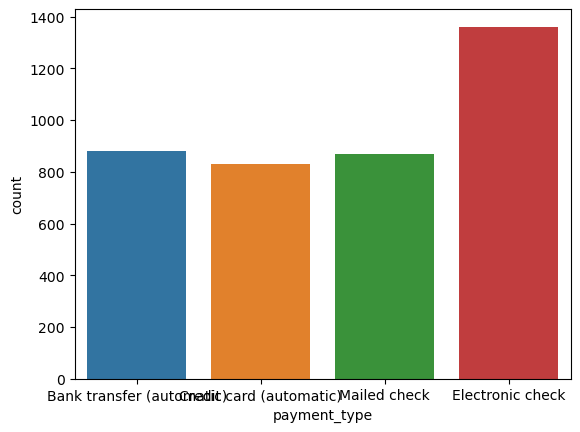

                           payment_type  payment_type
Electronic check                   1361      0.345169
Bank transfer (automatic)           880      0.223180
Mailed check                        870      0.220644
Credit card (automatic)             832      0.211007


In [9]:
#THIS IS FOR TRAIN
for col in cat_cols:
    print(f'Univariate assessment of feature {col}:')
    sns.countplot(data=train, x=col)
    plt.show()
    print(
        pd.concat([train[col].value_counts(),
        train[col].value_counts(normalize=True)],
             axis=1))

In [ ]:
# # THIS IS FOR DF
# for col in cat_cols:
#     print(f'Univariate assessment of feature {col}:')
#     sns.countplot(data=df, x=col)
#     plt.show()
#     print(
#         pd.concat([df[col].value_counts(),
#         df[col].value_counts(normalize=True)],
#              axis=1))

In [ ]:
sns.barplot(y='senior_citizen',x='churn',data=train)
plt.show()

In [ ]:
# Lets Run some CHi2 Tests:

#CONTRACT TYPE
train[['contract_type','churn']]

df_contract_x =pd.crosstab(train['contract_type'],train['churn'])
df_contract_x

In [ ]:
stats.chi2_contingency(df_contract_x)

In [ ]:
# Lets Run some CHi2 Tests:

#DEPENDENTS
train[['dependents','churn']]

df_dependents_x =pd.crosstab(train['dependents'],train['churn'],margins=True)
df_dependents_x

In [ ]:
stats.chi2_contingency(df_dependents_x)

In [ ]:
# Lets Run some CHi2 Tests:

#PAPERLESS
train[['paperless_billing','churn']]

df_paperless_x =pd.crosstab(train['paperless_billing'],train['churn'])
df_paperless_x

In [ ]:
stats.chi2_contingency(df_paperless_x)

In [ ]:
# Lets Run some CHi2 Tests:

#GENDER
train[['gender','churn']]

df_gender_x =pd.crosstab(train['gender'],train['churn'])
df_gender_x

In [ ]:
stats.chi2_contingency(df_gender_x)

In [ ]:
# Lets Run some CHi2 Tests:

#SENIOR CITIZEN
train[['senior_citizen','churn']]

df_senior_x =pd.crosstab(train['senior_citizen'],train['churn'])
df_senior_x

In [ ]:
stats.chi2_contingency(df_senior_x)

In [ ]:
# Lets Run some CHi2 Tests:

#PARTNER
train[['partner','churn']]

df_partner_x =pd.crosstab(train['partner'],train['churn'])
df_partner_x

In [ ]:
stats.chi2_contingency(df_partner_x)

In [ ]:
# Lets Run some CHi2 Tests:

#PAYMENT_TYPE
train[['payment_type','churn']]

df_payment_x =pd.crosstab(train['payment_type'],train['churn'])
df_payment_x

In [ ]:
stats.chi2_contingency(df_payment_x)

In [ ]:
for col in cat_cols_e:
    if col != 'churn':
        sns.barplot(data=train,
                    x=col,
                    y = 'churn_Yes',
                   ci=False)
        plt.title(f'Customer CHURN based on {col}')
        plt.axhline(train.churn_Yes.mean(),label='Overall Population Churn Rate: ~ 26%',color='red',linewidth=4)
        plt.legend()
        plt.show()

In [ ]:
df_payment_x =pd.crosstab(train['payment_type'],train['churn'])
df_payment_x

In [ ]:
train.info()

In [ ]:
train_encoded.columns

In [ ]:
cat_cols2, num_cols2 = [], []
for col in train_encoded.columns:
    if train_encoded[col].dtype != 'O':
        cat_cols2.append(col)
    else:
        if train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [ ]:
# filename = "telco_new_train2013.csv"
# train.to_csv(filename,index=False)

In [ ]:
sns.barplot(y='senior_citizen',x='churn',data=train_encoded)
plt.show()

In [ ]:
# sns.pairplot(train,hue='churn',corner=True)

#### OK, DO THE THING...

In [ ]:
X_cols = cat_cols_e
y_cols = 'churn_Yes'

In [ ]:
X_cols.remove('churn_Yes')
X_cols,y_cols

In [ ]:
# make the thing
clf = DecisionTreeClassifier()

In [ ]:
# whats the thing?
clf

In [ ]:
X_train = train[X_cols]
y_train = train['churn']

X_validate = validate[X_cols]
y_validate = validate['churn']

X_test = test[X_cols]
y_test = test['churn']

In [ ]:
# fit the thing:
# note that i am not assigning clf.fit into anything
# clf.fit changes the object itself,
# which means its ready to use!
clf.fit(X_train, y_train)

In [ ]:
# use the thing!!
model_1_preds = clf.predict(X_train)
model_1_preds[:10]

In [ ]:
# accuracy lil more like we saw before
accuracy_score(y_train, model_1_preds)

In [ ]:
pd.crosstab(model_1_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      model_1_preds))

In [ ]:
model_1_proba = clf.predict_proba(X_train)
model_1_proba[:10]

In [ ]:
print(f'''
Performance in accuracy of Decision Tree 1 on training data:
Accuracy (train): {clf.score(X_train, y_train)}
Accuracy (validate): {round(clf.score(X_validate, y_validate), 5)}''')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# make the thing
rf = RandomForestClassifier(n_estimators=25)
# fit the thing
# note: if we narrow down the feature in fit:
rf.fit(X_train, y_train)
# use the thing
# we need to do it on predict as well!!
rf1_preds = rf.predict(X_train)

In [ ]:
pd.crosstab(rf1_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      rf1_preds))

In [ ]:
rf1_proba = rf.predict_proba(X_train)
rf1_proba[:10]

In [ ]:
print(f'''
Performance in accuracy of Random Forest 1 on training data:
Accuracy (train): {rf.score(X_train, y_train)}
Accuracy (validate): {round(rf.score(X_validate, y_validate), 5)}''')

In [ ]:
# make the thing
rf = RandomForestClassifier(n_estimators=101)
# fit the thing
# note: if we narrow down the feature in fit:
rf.fit(X_train, y_train)
# use the thing
# we need to do it on predict as well!!
rf2_preds = rf.predict(X_train)

In [ ]:
pd.crosstab(rf2_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      rf2_preds))

In [ ]:
rf2_proba = rf.predict_proba(X_train)
rf2_proba[:10]

In [ ]:
print(f'''
Performance in accuracy of Random Forest 1 on training data:
Accuracy (train): {rf.score(X_train, y_train)}
Accuracy (validate): {round(rf.score(X_validate, y_validate), 5)}''')

#### OK, OPTIMIZE ...

In [ ]:
# make the thing
clf = DecisionTreeClassifier(min_samples_leaf=101)
clf.fit(X_train, y_train)
model_1_preds = clf.predict(X_train)
model_1_preds[:10]

In [ ]:
model_1_proba = clf.predict_proba(X_train)
model_1_proba[:10]

In [ ]:
pd.crosstab(model_1_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      model_1_preds))

In [ ]:
print(f'''
Performance in accuracy of Decision Tree 1 on training data:
Accuracy (train): {clf.score(X_train, y_train)}
Accuracy (validate): {round(clf.score(X_validate, y_validate), 5)}''')

In [ ]:
# make the thing
clf = DecisionTreeClassifier(min_samples_leaf=51)
clf.fit(X_train, y_train)
model_2_preds = clf.predict(X_train)
model_2_preds[:10]

In [ ]:
model_2_proba = clf.predict_proba(X_train)
model_2_proba[:10]

In [ ]:
pd.crosstab(model_2_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      model_2_preds))

In [ ]:
print(f'''
Performance in accuracy of Decision Tree 1 on training data:
Accuracy (train): {clf.score(X_train, y_train)}
Accuracy (validate): {round(clf.score(X_validate, y_validate), 5)}''')

In [ ]:
# make the thing
rf = RandomForestClassifier(n_estimators=101,max_depth=4)
# fit the thing
# note: if we narrow down the feature in fit:
rf.fit(X_train, y_train)
# use the thing
# we need to do it on predict as well!!
rf3_preds = rf.predict(X_train)

In [ ]:
pd.crosstab(rf3_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      rf3_preds))

In [ ]:
rf3_proba = rf.predict_proba(X_train)
rf3_proba[:10]

In [ ]:
print(f'''
Performance in accuracy of Random Forest 1 on training data:
Accuracy (train): {rf.score(X_train, y_train)}
Accuracy (validate): {round(rf.score(X_validate, y_validate), 5)}''')

In [ ]:
# make the thing
rf = RandomForestClassifier(n_estimators=101,max_depth=2)
# fit the thing
# note: if we narrow down the feature in fit:
rf.fit(X_train, y_train)
# use the thing
# we need to do it on predict as well!!
rf4_preds = rf.predict(X_train)

In [ ]:
pd.crosstab(rf4_preds,y_train) # see the actual survived status is now columns

In [ ]:
# classification report:
print(
    classification_report(y_train,
                      rf4_preds))

In [ ]:
rf4_proba = rf.predict_proba(X_train)
rf4_proba[:10]

In [ ]:
np.unique(rf4_preds,return_counts=True)

In [ ]:
print(f'''
Performance in accuracy of Random Forest 1 on training data:
Accuracy (train): {rf.score(X_train, y_train)}
Accuracy (validate): {round(rf.score(X_validate, y_validate), 5)}''')

## CREATE A df to turn into a .csv titled PREDICTIONS with 3 cols